In [179]:
#exam may 2024

from skimage import color, io, measure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
import math
from skimage.filters import threshold_otsu
from skimage import color
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.morphology import binary_closing, binary_opening
from skimage.color import label2rgb
from scipy.stats import norm
from scipy.spatial import distance
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import swirl
from skimage.transform import matrix_transform
from skimage import segmentation
import glob
from PIL import Image
from sklearn.decomposition import PCA
from skimage.transform import warp
from scipy.ndimage import binary_dilation, binary_erosion
from skimage import io, img_as_ubyte, color
from exam_functions import *

# import SimpleITK as sitk
from IPython.display import clear_output

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage import img_as_ubyte
import glob
import os
import pathlib
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import matrix_transform
import pandas as pd
from scipy.stats import norm
from skimage import color
from skimage.util import img_as_float, img_as_uint
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import SimpleITK as sitk


In [180]:
in_dir = './may2024/02502_exam_spring_2024_data/'

In [181]:

#PCA on pistachio nuts
wine_data = np.loadtxt('./may2024/02502_exam_spring_2024_data/winePCA/wine-data.txt', comments="%")
x = wine_data[:, :13]
producer = wine_data[:, 13]
n_feat = x.shape[1]
n_obs = x.shape[0]

print(x)

mean = np.mean(x, axis = 0)  #computes mean of each feature
data = x - mean
min_val = np.min(x, axis =0)
max_val = np.max(x, axis = 0)
diff_min_max = max_val-min_val
diff_min_max

data = data / diff_min_max
data

print(data[0][0]) #alcohol level of first wine

cov_data = np.cov(data.T) 
avg_val = np.average(cov_data)

values, vectors = np.linalg.eig(cov_data)
#projection
pc_proj = vectors.T.dot(data.T)
first_proj = pc_proj[:, 0]
max_proj = np.max(first_proj)
min_proj = np.min(first_proj)

diff_proj = max_proj - min_proj
diff_proj
avg_val

v_norm = values / values.sum() * 100

answer = v_norm[0] + v_norm[1] + v_norm[2] + v_norm[3] + v_norm[4]
print(f"Answer: Variance explained by the first five PC: {answer:.2f}")

print(producer)
print(pc_proj.shape)


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
0.3235215848610307
Answer: Variance explained by the first five PC: 81.27
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 

In [182]:
wine_prod1 = []
wine_prod2 = []

pc1 = pc_proj[0, :]
pc1.shape

for i, prod in enumerate(producer):
    if prod == 1.:
        wine_prod1.append(pc1[i])
    elif prod == 2.:
        wine_prod2.append(pc1[i])
    else:
        break

avg1 = np.average(wine_prod1)
avg2 = np.average(wine_prod2)
diff = avg2 - avg1
diff

0.48273699841405865

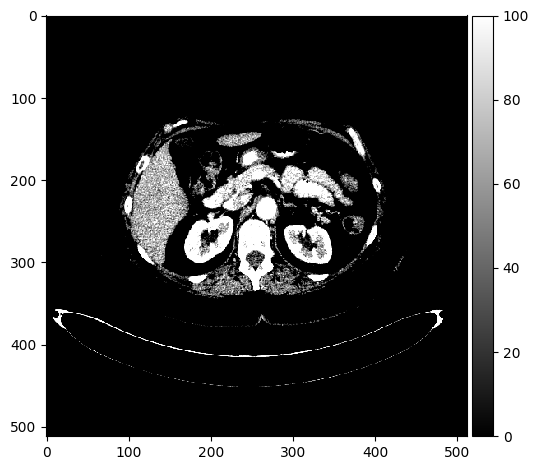

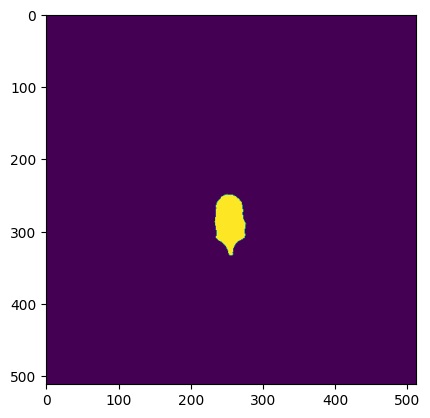

std: 221.86493449092632
mu : 256.12009419152275


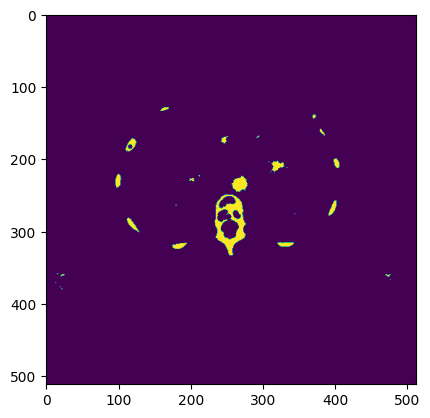

Number of labels: 30


In [212]:
ct = dicom.read_file('./may2024/02502_exam_spring_2024_data/vertebraCT/1-353.dcm') #single dicom slice w/ annotations
img = ct.pixel_array #extract pixel data, already hounsfield units -> its the format for dicom images
io.imshow(img, vmin=0, vmax=100, cmap='gray')
io.show()

roi_vert = io.imread('./may2024/02502_exam_spring_2024_data/vertebraCT/vertebra_gt.png')

plt.imshow(roi_vert)
plt.show()
vert_mask = roi_vert > 0
vert_values = img[vert_mask] #spleen values contain the HU values (HU values are the pixel value for DICOM images, )
mu_vert = np.mean(vert_values)
std_vert = np.std(vert_values)

print(f"std: {std_vert}")
print(f"mu : {mu_vert}")

vert_bin = img > 200

footprint = disk(3)
closed = binary_closing(vert_bin, footprint)

plt.imshow(closed)
plt.show()

label_img = measure.label(closed)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")
region_props = measure.regionprops(label_img)

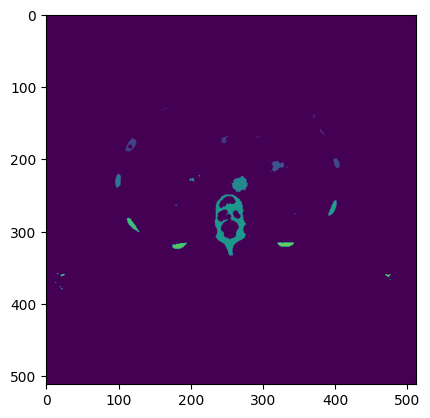

1467.0

In [184]:
min_area = 500

min_blob = np.inf
max_blob = -np.inf

label_img_filter = label_img.copy()
for region in region_props:
    area = region.area
    if area > max_blob:
        max_blob = area
    if area < min_blob:
        min_blob = area
    if area < min_area:
        for coord in region.coords:
            label_img_filter[coord[0], coord[1]] = 0 #segmentation alg result

plt.imshow(label_img)
plt.show()


max_blob

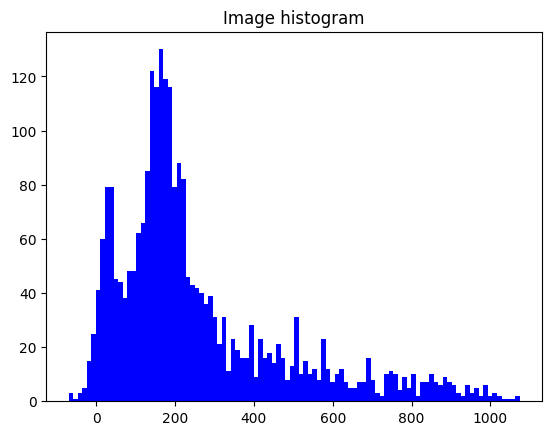

In [185]:
#im_gray = color.rgb2gray(vert_)  # dataype = float64

# histogram of a gray scale image (float64)
plt.hist(vert_values, bins=100, color="blue", alpha=1.0)
plt.title("Image histogram")
io.show()

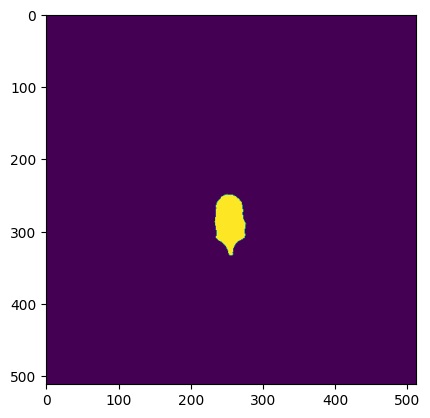

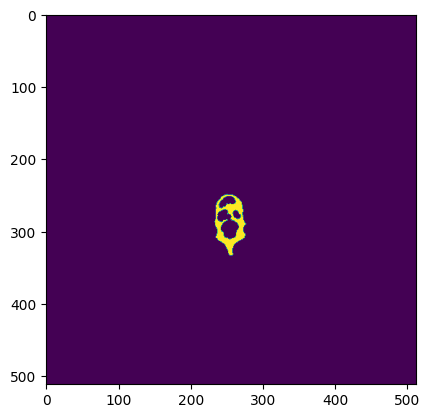

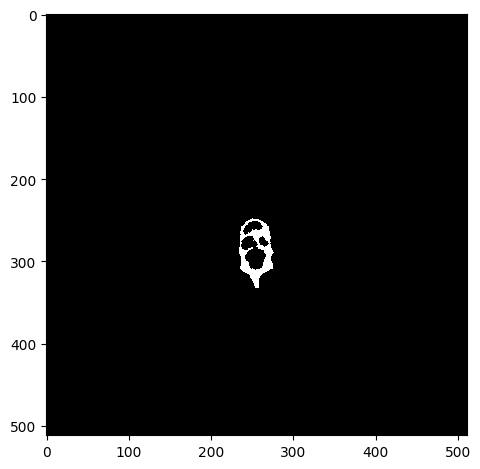

DICE score 0.7307596513075965


In [211]:

#compare founnd blobs with bloodGT image
vertGT = io.imread('./may2024/02502_exam_spring_2024_data/vertebraCT/vertebra_gt.png')
plt.imshow(vertGT)
plt.show()

plt.imshow(label_img_filter)
plt.show()

new_blobs_image = label_img_filter > 0
io.imshow(new_blobs_image)
io.show()

gt_bin = vertGT > 0
dice_score = 1 - distance.dice(new_blobs_image.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

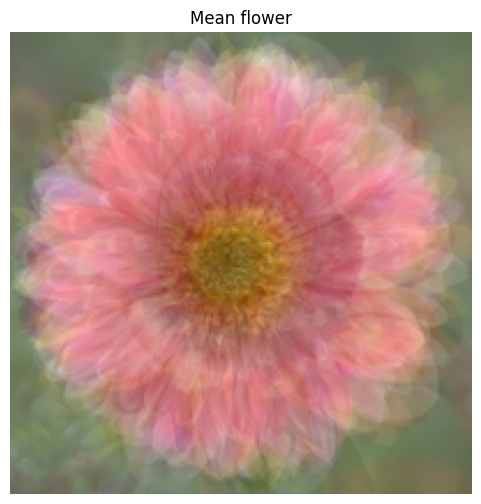

(15, 120000)
0.48789000960299767


In [187]:
#pca on fish
in_dir = './may2024/02502_exam_spring_2024_data/flowers/'

files = glob.glob(f"{in_dir}/*.jpg")
height, width, channels = io.imread(files[0]).shape

data_matrix = np.zeros((len(files) , height * width * channels))
for i, f in enumerate(files):
    if i == 15:
        break
    data_matrix[i, :] = io.imread(f).flatten()
average_flower = np.mean(data_matrix, axis=0)

average_flower_img = create_u_byte_image_from_vector(average_flower, height, width, channels)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_flower_img)
ax.set_title("Mean flower")
ax.set_axis_off()
plt.show()

print(data_matrix.shape)

flower_pca = PCA(n_components=5)
flower_pca.fit(data_matrix)

explained_variance = flower_pca.explained_variance_ratio_
print(explained_variance[0])



(15, 5)


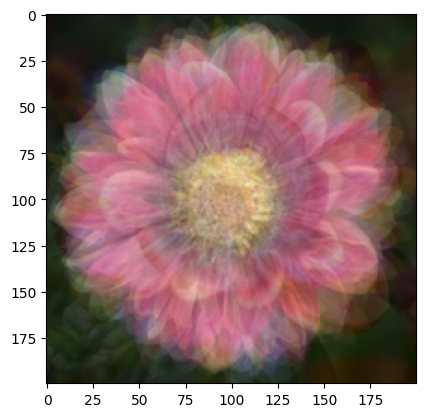

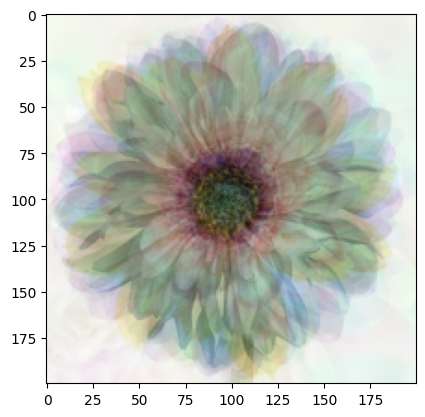

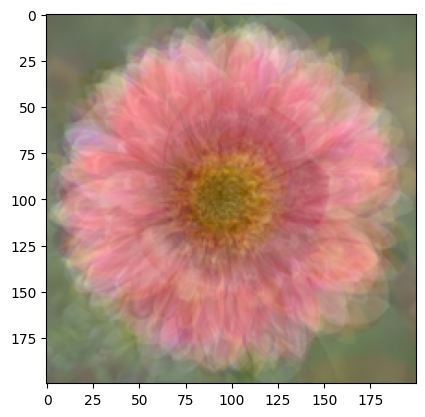

In [188]:
components = flower_pca.transform(data_matrix)
print(components.shape)

synth_image_plus = average_flower + 3 * np.sqrt(flower_pca.explained_variance_[0]) * flower_pca.components_[0, :]
synth_image_minus = average_flower - 3 * np.sqrt(flower_pca.explained_variance_[0]) * flower_pca.components_[0, :]

synth_image_minus = create_u_byte_image_from_vector(synth_image_minus, height, width, channels)
synth_image_plus = create_u_byte_image_from_vector(synth_image_plus, height, width, channels)


plt.imshow(synth_image_minus)
plt.show()
plt.imshow(synth_image_plus)
plt.show()
plt.imshow(average_flower_img)
plt.show()
 

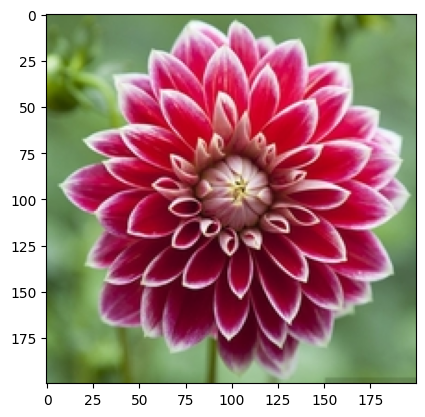

(1, 5)
(5,)
(5,)
39762.33545394363


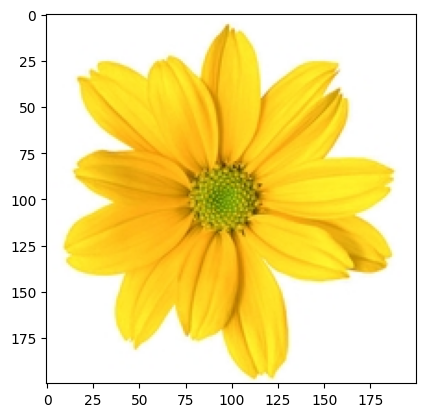

In [189]:
super_pizza = io.imread("./may2024/02502_exam_spring_2024_data/idealflower.jpg")
#find most similar

plt.imshow(super_pizza)
plt.show()

super_pizza = super_pizza.flatten()
im_favourite_flat = super_pizza.reshape(1, -1)
superpizza_pca_coords = flower_pca.transform(im_favourite_flat)
print(superpizza_pca_coords.shape)
superpizza_pca_coords = superpizza_pca_coords.flatten()

pc2 = components[1, :]
print(pc2.shape)
print(superpizza_pca_coords.shape)

comp_sub = pc2 - superpizza_pca_coords
pca_distances = np.linalg.norm(comp_sub)
best_match = np.argmin(pca_distances) #most similar pizza
best_matching_pizza = data_matrix[best_match, :]

print(pca_distances)

best_pizza_im = create_u_byte_image_from_vector(best_matching_pizza, height, width, channels)
plt.imshow(best_pizza_im)
plt.show()

In [191]:
pots = io.imread('./may2024/02502_exam_spring_2024_data/pots/pots.jpg')

pots_r = pots[:,:,0]


footprint = np.ones([10, 10])
med_img = median(pots_r, footprint)

im_bin = med_img > 200
im_bin.sum()

7324

In [236]:
def parametric_distance_classifier(lista):
    means, stds = [], []

    for el in lista:
        mu = round(np.mean(el), 3)
        std = round(np.std(el), 3)
        means.append(mu)
        stds.append(std)
        print(f"{el} - mean = {mu}     std = {std}")

    thresholds = []

    # Calcola la soglia di decisione tra classi adiacenti
    for i in range(len(means) - 1):
        mu_low = means[i]
        std_low = stds[i]
        mu_high = means[i + 1]
        std_high = stds[i + 1]
        thres_low_high = None

        # Calcola la soglia tra le due distribuzioni normali
        for test_value in np.linspace(mu_low, mu_high, 1000):
            if norm.pdf(test_value, mu_high, std_high) > norm.pdf(
                test_value, mu_low, std_low
            ):
                thres_low_high = round(test_value, 3)
                break

        # Memorizza la soglia tra classi adiacenti
        if thres_low_high is not None:
            thresholds.append((f"class_{i + 1} and class_{i + 2}", thres_low_high))

    result = sorted(thresholds, key=lambda x: x[1])
    print("\nThresholds between adjacent classes:")
    for threshold in result:
        print(f"{threshold[0]}: {threshold[1]}")
    return result

In [ ]:
#inspect the fitted gaussians and find the intersections
# Automatic intersection Fat - Soft
for test_value in np.linspace(mu_fat, mu_soft, 1000):
    if norm.pdf(test_value, mu_soft, std_soft) > norm.pdf(test_value, mu_fat, std_fat):
        thres_fat_soft = test_value
        print(f"Fat - Soft threshold: {thres_fat_soft}")
        break

# Automatic intersection Soft - Bone
for test_value in np.linspace(mu_soft, mu_bone, 1000):
    if norm.pdf(test_value, mu_bone, std_bone) > norm.pdf(test_value, mu_soft, std_soft):
        thres_soft_bone = test_value
        print(f"Soft - Bone threshold: {thres_soft_bone}")
        break

#compute the images
fat_img = (img > t_background) & (img <= thres_fat_soft)
soft_img = (img > thres_fat_soft) & (img <= thres_soft_bone)
bone_img = (img > thres_soft_bone) & (img <= 1000)

#display the images
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

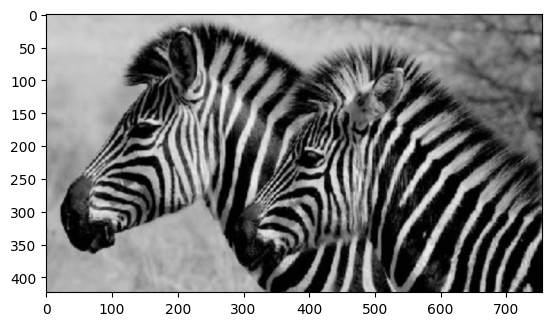

0.696256634258607

In [246]:
zebra = io.imread('./may2024/02502_exam_spring_2024_data/zebra/Zebra.png')

white_stripes = io.imread('./may2024/02502_exam_spring_2024_data/zebra/Zebra_whiteStripes.png')
black_stripes = io.imread('./may2024/02502_exam_spring_2024_data/zebra/Zebra_blackStripes.png')

plt.imshow(zebra)
plt.show()

thresh = (np.mean(white_stripes) + np.mean(black_stripes))/2
thresh

#display the images
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

#res = parametric_distance_classifier(im_list) #optimal threshold




In [243]:
import cv2

-24.98607609073691
1.6554596872730467


13.502781752923271

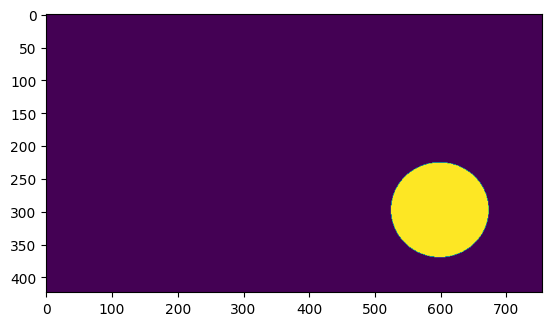

In [250]:
zebra_mask = io.imread('./may2024/02502_exam_spring_2024_data/zebra/Zebra_MASK.png')
plt.imshow(zebra_mask)

masked_image = cv2.bitwise_and(zebra, zebra, mask=zebra_mask)

std_black = np.std(black_stripes)
std_white = np.std(white_stripes)

mu_black = np.mean(black_stripes)
mu_white = np.mean(white_stripes)

root = -((std_black**2) * (std_white**2) * (2*mu_black*mu_white - (mu_white**2) - 2 * (std_white**2)*math.log(std_white/std_black) - (mu_black**2) + 2*(std_black**2)*math.log(std_white/std_black)))
denom = -(std_white**2) + (std_black**2)
pt1 = (std_black**2) * mu_white - (mu_white**2)*mu_black

v_sum = (pt1 + math.sqrt(root)) / denom
v_dif = (pt1 - math.sqrt(root)) / denom 
print(v_sum)
print(v_dif)

mu_white
std_white

In [194]:
def imshow_orthogonal_view(sitkImage, origin=None, title=None):
    """
    Display the orthogonal views of a 3D volume from the middle of the volume.

    Parameters
    ----------
    sitkImage : SimpleITK image
        Image to display.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    data = sitk.GetArrayFromImage(sitkImage)

    if origin is None:
        origin = np.array(data.shape) // 2

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    data = img_as_ubyte(data / np.max(data))
    axes[0].imshow(data[origin[0], ::-1, ::-1], cmap="gray")
    axes[0].set_title("Axial")

    axes[1].imshow(data[::-1, origin[1], ::-1], cmap="gray")
    axes[1].set_title("Coronal")

    axes[2].imshow(data[::-1, ::-1, origin[2]], cmap="gray")
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)


def overlay_slices(sitkImage0, sitkImage1, origin=None, title=None):
    """
    Overlay the orthogonal views of a two 3D volume from the middle of the volume.
    The two volumes must have the same shape. The first volume is displayed in red,
    the second in green.

    Parameters
    ----------
    sitkImage0 : SimpleITK image
        Image to display in red.
    sitkImage1 : SimpleITK image
        Image to display in green.
    origin : array_like, optional
        Origin of the orthogonal views, represented by a point [x,y,z].
        If None, the middle of the volume is used.
    title : str, optional
        Super title of the figure.

    Note:
    On the axial and coronal views, patient's left is on the right
    On the sagittal view, patient's anterior is on the left
    """
    vol0 = sitk.GetArrayFromImage(sitkImage0)
    vol1 = sitk.GetArrayFromImage(sitkImage1)

    if vol0.shape != vol1.shape:
        raise ValueError("The two volumes must have the same shape.")
    if (
        np.min(vol0) < 0 or np.min(vol1) < 0
    ):  # Remove negative values - Relevant for the noisy images
        vol0[vol0 < 0] = 0
        vol1[vol1 < 0] = 0
    if origin is None:
        origin = np.array(vol0.shape) // 2

    sh = vol0.shape
    R = img_as_ubyte(vol0 / np.max(vol0))
    G = img_as_ubyte(vol1 / np.max(vol1))

    vol_rgb = np.zeros(shape=(sh[0], sh[1], sh[2], 3), dtype=np.uint8)
    vol_rgb[:, :, :, 0] = R
    vol_rgb[:, :, :, 1] = G

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(vol_rgb[origin[0], ::-1, ::-1, :])
    axes[0].set_title("Axial")

    axes[1].imshow(vol_rgb[::-1, origin[1], ::-1, :])
    axes[1].set_title("Coronal")

    axes[2].imshow(vol_rgb[::-1, ::-1, origin[2], :])
    axes[2].set_title("Sagittal")

    [ax.set_axis_off() for ax in axes]

    if title is not None:
        fig.suptitle(title, fontsize=16)


# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations

    metric_values = []
    multires_iterations = []


# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations

    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()


# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations

    metric_values.append(registration_method.GetMetricValue())
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, "r")
    plt.plot(
        multires_iterations,
        [metric_values[index] for index in multires_iterations],
        "b*",
    )
    plt.xlabel("Iteration Number", fontsize=12)
    plt.ylabel("Metric Value", fontsize=12)
    plt.show()


# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the
# metric_values list.
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))


def command_iteration(method):
    print(
        f"{method.GetOptimizerIteration():3} "
        + f"= {method.GetMetricValue():10.5f} "
        + f": {method.GetOptimizerPosition()}"
    )

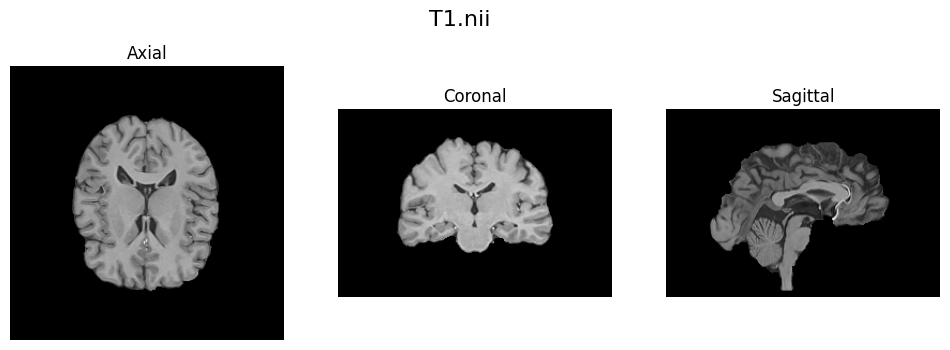

In [195]:
#image registration

vol_sitk1 = sitk.ReadImage('./may2024/02502_exam_spring_2024_data/brain/T1_brain_template.nii.gz')

# Display the volume
imshow_orthogonal_view(vol_sitk1, title="T1.nii")


In [196]:
def rotation_matrix(pitch, roll, yaw):
    """
    Returns the rotation matrix for given roll, pitch, and yaw angles.
    """
    cos_pitch = np.cos(pitch)
    sin_pitch = np.sin(pitch)
    cos_roll = np.cos(roll)
    sin_roll = np.sin(roll)
    cos_yaw = np.cos(yaw)
    sin_yaw = np.sin(yaw)

    # Define the rotation matrix for pitch, roll, and yaw
    R_pitch = np.array(
        [[1, 0, 0], [0, cos_pitch, -sin_pitch], [0, sin_pitch, cos_pitch]],
    )

    R_roll = np.array([[cos_roll, 0, sin_roll], [0, 1, 0], [-sin_roll, 0, cos_roll]])

    R_yaw = np.array([[cos_yaw, -sin_yaw, 0], [sin_yaw, cos_yaw, 0], [0, 0, 1]])

    # Combine the rotation matrices to obtain the final rotation matrix
    rotation_matrix = np.dot(R_yaw, np.dot(R_pitch, R_roll))
    return rotation_matrix

In [199]:
from math import radians
from skimage.morphology import ball

'closing_filter = sitk.BinaryMorphologicalClosingImageFilter()\nclosing_filter.SetKernelRadius(5)\nclosed_image = closing_filter.Execute(otsu_thresholded_image)'

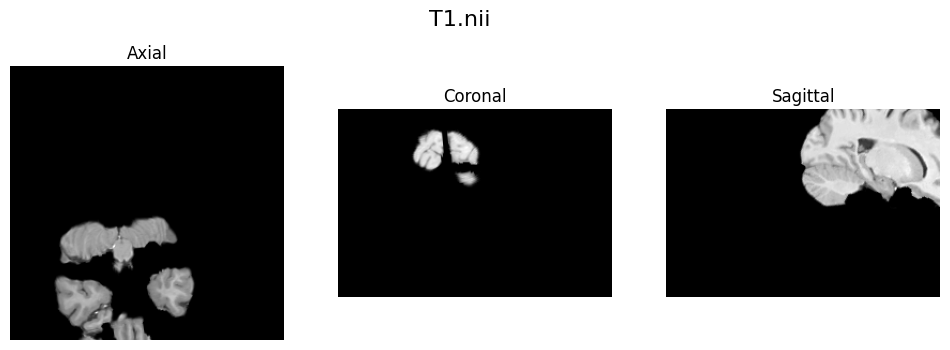

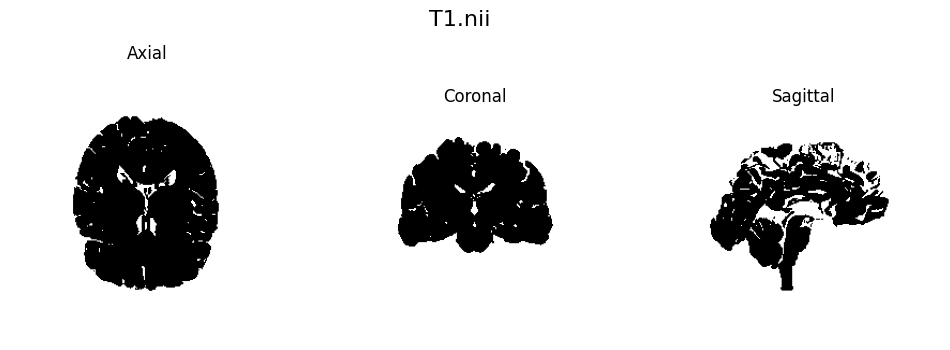

In [206]:
pitch = radians(-30)
yaw = radians(10)

rot_mat = rotation_matrix(pitch, 0, yaw)

# Create an affine transform
transform = sitk.AffineTransform(3)  # 3D transformation

# Set the rotation matrix to the affine transform
transform.SetMatrix(rot_mat.flatten())
# Apply the transformation to the image
rotated_image = sitk.Resample(vol_sitk1, transform)

# Save the rotated image
imshow_orthogonal_view(rotated_image, title="T1.nii")

otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_thresholded_image = otsu_filter.Execute(vol_sitk1)

imshow_orthogonal_view(otsu_thresholded_image, title="T1.nii")
otsu_image = sitk.GetArrayFromImage(otsu_thresholded_image)

radius = 5
structuring_element = ball(5)

closed = binary_closing(otsu_image, structuring_element)

'''closing_filter = sitk.BinaryMorphologicalClosingImageFilter()
closing_filter.SetKernelRadius(5)
closed_image = closing_filter.Execute(otsu_thresholded_image)'''



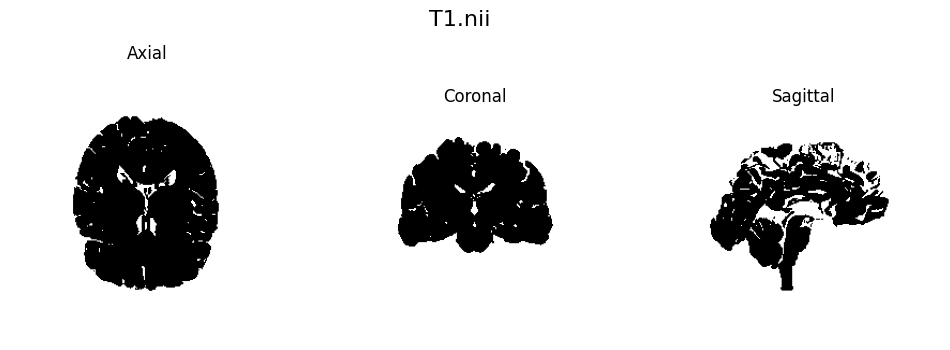

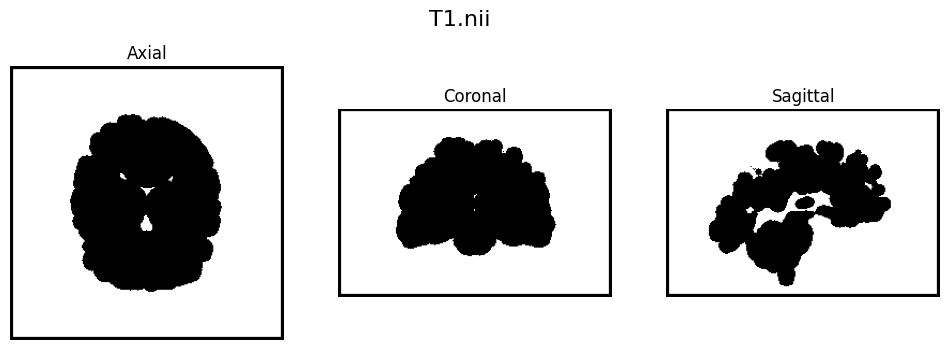

In [210]:

imshow_orthogonal_view(otsu_thresholded_image, title="T1.nii")
structuring_element = ball(3)
eroded_image = binary_erosion(closed, structuring_element)

eroded_image = eroded_image.astype(np.uint8)
eroded_sitk = sitk.GetImageFromArray(eroded_image)

imshow_orthogonal_view(eroded_sitk, title="T1.nii")



In [234]:
#lda
x = np.array([30, 10])
mu_1 = np.array([24, 3])
mu_2 = np.array([45, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 0.5 * (
    np.dot(np.dot(mu_1.T, sigma_inv), mu_1) - np.dot(np.dot(mu_2.T, sigma_inv), mu_2)
)

cw = 1 - 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) + cw
print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > cw:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")


y = -36.25 e cw = -371.25
Il punto [30 10] appartiene alla Classe 2


In [235]:
x = np.array([30, 10])
mu_1 = np.array([24, 3])
mu_2 = np.array([45, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) - cw

print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > 0:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")

y = -37.25 e cw = 372.25
Il punto [30 10] appartiene alla Classe 1
